In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
#importing dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print("size of training data ",x_train.shape[0])
print("size of test data ",x_test.shape[0])

size of training data  60000
size of test data  10000


In [4]:
print("shape of an image " ,x_train[0].shape)

shape of an image  (28, 28)


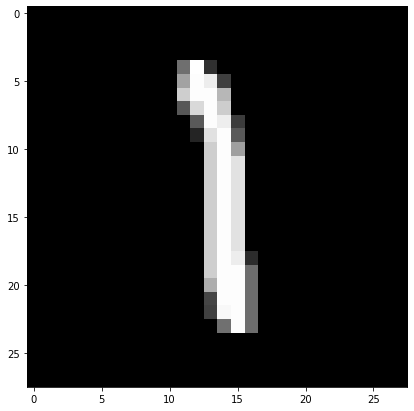

The above digit is 1


In [5]:
#display or plot a number
plt.figure(figsize =(7,7))
idx=random.randint(0,255)

#cextracting image from the numpy array
grid_data = x_train[idx]

plt.imshow(grid_data, interpolation ='none',cmap='gray')
plt.show()
print('The above digit is ' + str(y_train[idx]))

In [6]:
#reshape to 784 dim
x_train = x_train.flatten().reshape(60000,784)
x_test = x_test.flatten().reshape(10000,784)

print('shape of training data ', x_train.shape)
print('shape of test data ', x_test.shape)

shape of training data  (60000, 784)
shape of test data  (10000, 784)


In [7]:
#before training the neural network, we should always remove mean and set variance to 1 of our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#Sigmoid activation

                        Architecture
      input(784)>> layer_1(128, Sigmoid) >> layer_2(64,Sigmoid) >> dropout(0.3) >> layer_3(10, None) >> Softmax

In [8]:
#model with sigmoid activations

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(784),
  tf.keras.layers.Dense(128, activation='sigmoid', kernel_initializer=tf.keras.initializers.RandomNormal(stddev=2/(912))),
  tf.keras.layers.Dense(64, activation='sigmoid',kernel_initializer=tf.keras.initializers.RandomNormal(stddev=2/(192))),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10, kernel_initializer=tf.keras.initializers.RandomNormal(stddev=2/(74))),
  tf.keras.layers.Softmax()
])


In [9]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.09457207, 0.10587057, 0.08792143, 0.08475196, 0.1087532 ,
        0.08864668, 0.0840776 , 0.11601536, 0.11197972, 0.11741144]],
      dtype=float32)

In [10]:
#loss by a random model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()


2.3140187

In [11]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [12]:
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7133 - accuracy: 0.7878
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5428 - accuracy: 0.9291
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5240 - accuracy: 0.9436
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5137 - accuracy: 0.9520
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5060 - accuracy: 0.9596
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5006 - accuracy: 0.9638
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4967 - accuracy: 0.9676
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4936 - accuracy: 0.9704
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4904 - accuracy: 0.9734
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.488

dict_keys(['loss', 'accuracy'])


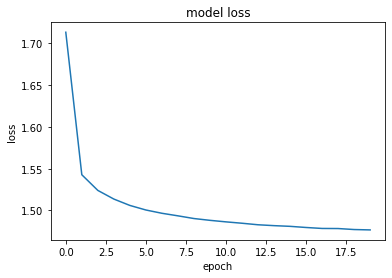

In [13]:
#plotting 
print(history.history.keys())
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [14]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 1.4985 - accuracy: 0.9625


[1.4985289573669434, 0.9624999761581421]

In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


#Relu activation

                        Architecture
      input(784)>> layer_1(128, Relu) >> layer_2(64,Relu) >> dropout(0.3) >> layer_3(10, None) >> Softmax

In [21]:
#model with Relu activations

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(784),
  tf.keras.layers.Dense(128, activation= 'relu', kernel_initializer=tf.keras.initializers.RandomUniform(minval = -0.087, maxval= 0.087)),
  tf.keras.layers.Dense(64, activation= 'relu',kernel_initializer=tf.keras.initializers.RandomUniform(minval= - 0.216, maxval = 0.216)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10, kernel_initializer=tf.keras.initializers.RandomUniform(minval= -0.306, maxval= 0.306)),
  tf.keras.layers.Softmax()
])


In [22]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [23]:
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5745 - accuracy: 0.8915
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5258 - accuracy: 0.9363
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5146 - accuracy: 0.9471
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5099 - accuracy: 0.9516
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5077 - accuracy: 0.9537
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5058 - accuracy: 0.9552
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5031 - accuracy: 0.9579
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5021 - accuracy: 0.9592
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5009 - accuracy: 0.9602
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.501

dict_keys(['loss', 'accuracy'])


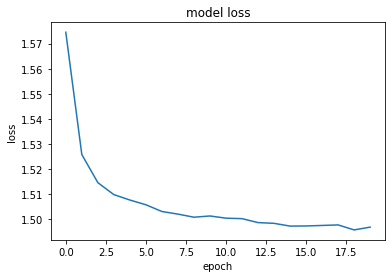

In [24]:
#plotting 
print(history.history.keys())
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [25]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 1.4963 - accuracy: 0.9647


[1.4963136911392212, 0.9646999835968018]

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
_________________________________________________________________
softmax_2 (Softmax)          (None, 10)                0         
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
